In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def parse_annotation(path):
    timestamps = []
    beats = []
    first_db = -1
    beat_cnt = 0
    with open(path, "r") as file:
        beat_id = 1
        time_signature = ''
        for i, line in enumerate(file):
            elements = line.split()
            timestamps.append(float(elements[0]))
            if elements[2].startswith('db'):
                beat_id = 1
                if first_db == -1:
                    first_db = i
                subelements = elements[2].split(',')
                for e in subelements:
                    if '/' in e:
                        if time_signature == '':
                            time_signature = e
                        else:
                            raise ValueError("Do not support time signature change")
            elif elements[2].startswith('bR'):
                raise ValueError("Do not support bR")
            elif first_db != -1:
                beat_id += 1
                beat_cnt = max(beat_cnt, beat_id)
            else:
                beat_id = 0
            beats.append(beat_id)

    # time_deltas = [seconds[0] if i == 0 else seconds[i] - seconds[i - 1] for i in range(len(seconds))]
    durations = [timestamps[i] - timestamps[i - 1] for i in range(1, len(timestamps))]
    for i in range(first_db):
        beats[i] = beat_cnt - first_db + i + 1
    beats = beats[:-1]
    
    return beat_cnt, time_signature, durations, beats

In [11]:

beat_cnt, time_signature, durations, beats = parse_annotation("asap-dataset/Mozart/Piano_Sonatas/8-1/Bogdanovitch01_annotations.txt")
print(beats)
print(durations)
duration_of_beats = [[durations[i] for i in range(len(beats)) if beats[i] == beat_id] for beat_id in range(1, beat_cnt + 1)]
for beat_duration in duration_of_beats:
    print(np.mean(beat_duration))



[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 

In [12]:
len(durations), len(beats), time_signature, beat_cnt

(530, 530, '4/4', 4)

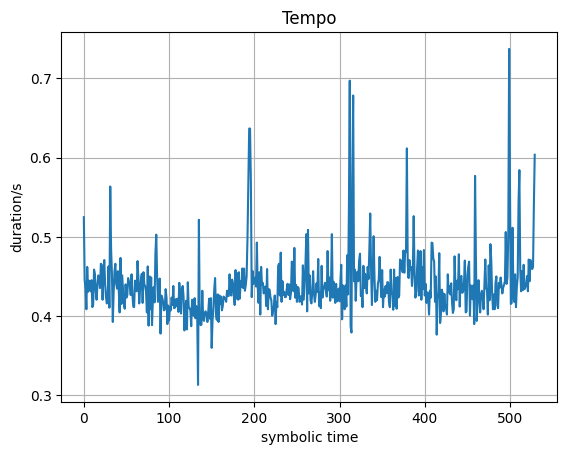

In [13]:

# Example data
x = range(len(durations))
y = durations

# Plot curve
plt.plot(x, y)

# Add labels and title
plt.xlabel('symbolic time')
plt.ylabel('duration/s')
plt.title('Tempo')

# Show plot
plt.grid(True)
plt.show()


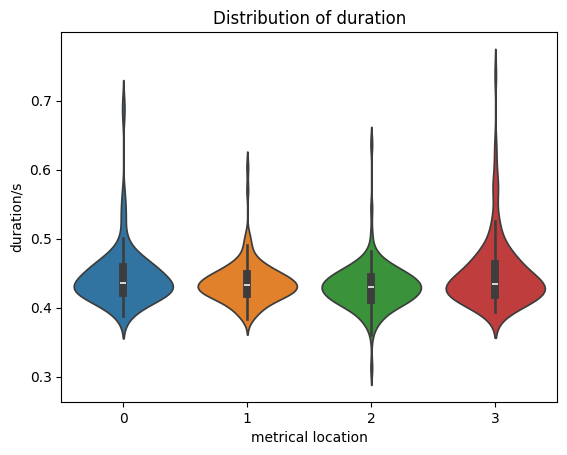

In [14]:
sns.violinplot(data=duration_of_beats)

plt.xlabel('metrical location')
plt.ylabel('duration/s')
plt.title('Distribution of duration')

plt.show()